# 分类数据
pandas的分类类型能够提高性能和内存的使用率。
# 问题
表中的一列通常会有重复的包含不同值的小集合的情况。我们已经学过了unique和value_counts，它们可以从数组提取出不同的值，并分别计算频率：

In [1]:
import pandas as pd
import tushare as ts

In [2]:
df=ts.get_stock_basics()
df.head()

,name,industry,area,pe,outstanding,totals,totalAssets,liquidAssets,fixedAssets,reserved,...,bvps,pb,timeToMarket,undp,perundp,rev,profit,gpr,npr,holders
code,,,,,,,,,,,,,,,,,,,,,
002938,N鹏鼎,元器件,深圳,62.15,2.31,23.11,2032557.75,1040264.13,0.00,0.00,...,5.69,4.07,20180918,0.00,0.00,0.00,0.00,0.00,4.54,408095.0
002259,升达林业,供气供热,四川,0.00,7.24,7.52,284906.13,171517.98,79040.80,71885.80,...,2.18,1.90,20080716,13266.97,0.18,-14.18,-466.68,12.10,-6.56,37927.0
002219,恒康医疗,中成药,甘肃,46.30,18.65,18.65,1004764.88,319343.19,203795.13,108219.77,...,2.28,1.57,20080306,118436.72,0.63,67.86,-56.30,31.11,3.88,24831.0
300345,红宇新材,钢加工,湖南,0.00,3.27,4.41,94718.11,45858.59,20612.00,24669.55,...,1.64,2.92,20120801,1418.97,0.03,-39.70,-95.66,25.88,-4.96,54901.0
300167,迪威迅,通信设备,深圳,0.00,3.00,3.00,118868.60,65652.96,6827.10,31287.58,...,2.32,2.31,20110125,6951.87,0.23,-34.11,-1324.05,21.03,-9.96,20000.0


In [3]:
stock=df.loc[:,['industry','area']]
stock.head()

,industry,area
code,,
002938,元器件,深圳
002259,供气供热,四川
002219,中成药,甘肃
300345,钢加工,湖南
300167,通信设备,深圳


In [4]:
stock.area.unique()

array(['深圳', '四川', '甘肃', '湖南', '安徽', '浙江', '上海', '广西', '重庆', '江苏', '宁夏',
       '山东', '陕西', '湖北', '广东', '福建', '青海', '北京', '西藏', '贵州', '新疆', '河南',
       '山西', '江西', '辽宁', '云南', '黑龙江', '吉林', '海南', '河北', '天津', '内蒙'],
      dtype=object)

In [5]:
stock.area.value_counts()

浙江     429
江苏     398
北京     314
广东     304
上海     284
深圳     282
山东     194
福建     131
四川     120
安徽     104
湖南     103
湖北     100
河南      79
辽宁      72
河北      56
新疆      53
天津      50
重庆      48
陕西      47
江西      41
吉林      41
山西      38
广西      37
黑龙江     37
甘肃      33
云南      33
海南      31
贵州      29
内蒙      25
西藏      17
宁夏      13
青海      12
Name: area, dtype: int64

许多数据系统（数据仓库、统计计算或其它应用）都发展出了特定的表征重复值的方法，以进行高效的存储和计算。在数据仓库中，最好的方法是使用所谓的包含不同值得维表(Dimension Table)，将主要的参数存储为引用维表整数键：

In [6]:
v=pd.Series([0,1,0,0]*2)
d=pd.Series(['horse','sheep'])
v,d

(0    0
 1    1
 2    0
 3    0
 4    0
 5    1
 6    0
 7    0
 dtype: int64, 0    horse
 1    sheep
 dtype: object)

In [7]:
d.take(v)

0    horse
1    sheep
0    horse
0    horse
0    horse
1    sheep
0    horse
0    horse
dtype: object

这种用整数表示的方法称为分类或字典编码表示法。不同值得数组称为分类、字典或数据级。表示分类的整数值称为分类编码或简单地称为编码。
分类表示可以在进行分析时大大的提高性能。你也可以在保持编码不变的情况下，对分类进行转换。一些相对简单的转变例子包括：
* 重命名分类。
* 加入一个新的分类，不改变已经存在的分类的顺序或位置。


# pandas的分类类型
pandas有一个特殊的分类类型，用于保存使用整数分类表示法的数据。

In [8]:
area=df.area.astype('category')
area.head()

code
002938    深圳
002259    四川
002219    甘肃
300345    湖南
300167    深圳
Name: area, dtype: category
Categories (32, object): [上海, 云南, 内蒙, 北京, ..., 重庆, 陕西, 青海, 黑龙江]

In [9]:
type(area.values)

pandas.core.arrays.categorical.Categorical

In [10]:
c=area.values

In [11]:
c.categories,c.codes

(Index(['上海', '云南', '内蒙', '北京', '吉林', '四川', '天津', '宁夏', '安徽', '山东', '山西', '广东',
        '广西', '新疆', '江苏', '江西', '河北', '河南', '浙江', '海南', '深圳', '湖北', '湖南', '甘肃',
        '福建', '西藏', '贵州', '辽宁', '重庆', '陕西', '青海', '黑龙江'],
       dtype='object'), array([20,  5, 23, ..., 18, 17, 24], dtype=int8))

将DF的列转化为分类类型

In [12]:
cat=stock.assign(area=stock.area.astype('category'))
cat.head()

,industry,area
code,,
002938,元器件,深圳
002259,供气供热,四川
002219,中成药,甘肃
300345,钢加工,湖南
300167,通信设备,深圳


In [13]:
cat.area.head()

code
002938    深圳
002259    四川
002219    甘肃
300345    湖南
300167    深圳
Name: area, dtype: category
Categories (32, object): [上海, 云南, 内蒙, 北京, ..., 重庆, 陕西, 青海, 黑龙江]

# 用分类进行计算
使用pandas.qcut面元函数。它会返回category对象

In [14]:
bins=pd.qcut(df.pe,6)

In [15]:
bins.head()

code
002938    (37.607, 67.027]
002259      (-0.001, 9.73]
002219    (37.607, 67.027]
300345      (-0.001, 9.73]
300167      (-0.001, 9.73]
Name: pe, dtype: category
Categories (6, interval[float64]): [(-0.001, 9.73] < (9.73, 17.787] < (17.787, 25.77] < (25.77, 37.607] < (37.607, 67.027] < (67.027, 8203.07]]

In [16]:
bins=pd.qcut(df.pe,6,labels=list('abcdef'))
bins.head()

code
002938    e
002259    a
002219    e
300345    a
300167    a
Name: pe, dtype: category
Categories (6, object): [a < b < c < d < e < f]

In [17]:
bins.values.categories,bins.values.codes

(Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object'),
 array([4, 0, 4, ..., 0, 0, 0], dtype=int8))

加上标签的面元分类不包含数据面元边界的信息，因此可以使用groupby提取一些汇总信息：

In [18]:
df.pe.groupby(bins).agg(['count','mean'])

,count,mean
pe,,
a,593,2.664250
b,592,14.162584
c,593,21.694401
d,592,31.164122
e,592,49.758514
f,593,259.201282


# 用分类提高性能
如果你是在一个特定数据集上做大量分析，将其转换为分类可以极大地提高效率。DataFrame列的分类使用的内存通常少的多。

In [19]:
cat=df.area.astype("category")

In [20]:
cat.memory_usage(),df.area.memory_usage()

(197371, 220720)

# 为建模创建虚拟变量
当你使用统计或机器学习工具时，通常会将分类数据转换为虚拟变量，也称为one-hot编码。这包括创建一个不同类别的列的DataFrame；这些列包含给定分类的1，其它为0

In [21]:
pd.get_dummies(df.area.astype('category')).head()

,上海,云南,内蒙,北京,吉林,四川,天津,宁夏,安徽,山东,...,湖南,甘肃,福建,西藏,贵州,辽宁,重庆,陕西,青海,黑龙江
code,,,,,,,,,,,,,,,,,,,,,
002938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002259,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
002219,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
300345,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
300167,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# GroupBy高级应用,分组转换和“解封”GroupBy
我们在分组操作中学习了apply方法，进行转换。还有另一个transform方法，它与apply很像，但是对使用的函数有一定限制：

* 它可以产生向分组形状广播标量值
* 它可以产生一个和输入组形状相同的对象
* 它不能修改输入


In [22]:
g=df.loc[:,['area','pe']].groupby('area')
g.mean().head()

,pe
area,
上海,47.486514
云南,121.247576
内蒙,21.831200
北京,72.518662
吉林,53.978049


假设我们想产生一个和df.loc[:,['area','pe']]形状相同的Series，但值替换为按键分组的平均值。我们可以传递函数lambda x: x.mean()进行转换：

In [23]:
g.transform(lambda x:x.mean()).head()

,pe
code,
002938,82.186418
002259,51.206917
002219,27.800303
300345,77.246408
300167,82.186418


In [24]:
g.transform('count').head()

,pe
code,
002938,282
002259,120
002219,33
300345,103
300167,282


我们可以计算每个分组的降序排名

In [25]:
g.transform(lambda x:x.rank(ascending=False)).head()

,pe
code,
002938,61.0
002259,114.0
002219,8.0
300345,94.5
300167,271.0


看一个由简单聚合构造的分组转化函数

In [26]:
g.transform(lambda x:(x-x.mean())/x.std()).head()

,pe
code,
002938,-0.084609
002259,-0.717331
002219,0.564356
300345,-0.242314
300167,-0.347052


我们可以用tansform或者apply可以获得等价结果

In [27]:
g.apply(lambda x:(x-x.mean())/x.std()).head()

,pe
code,
002938,-0.084609
002259,-0.717331
002219,0.564356
300345,-0.242314
300167,-0.347052


内置的聚合函数，比如mean或sum，通常比apply函数快，也比transform快。这允许我们进行一个所谓的解封（unwrapped）分组操作：

In [28]:
((df.loc[:,['pe']]-g.transform('mean'))/g.transform('std')).head()

,pe
code,
002938,-0.084609
002259,-0.717331
002219,0.564356
300345,-0.242314
300167,-0.347052


# 股票行业地域热力图

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid',{'font.sans-serif':['simhei','Arial']})
a=df.loc[:,['industry','area','pe']]
b=a.groupby(['industry','area']).count()
b.head()

pe
industry area    
专用机械     上海    10
         北京     7
         四川     6
         天津     1
         安徽     5

In [30]:
c=b.reset_index()
c.head()

,industry,area,pe
0,专用机械,上海,10
1,专用机械,北京,7
2,专用机械,四川,6
3,专用机械,天津,1
4,专用机械,安徽,5


In [31]:
d=c.pivot('industry','area','pe')
d.head()

area,上海,云南,内蒙,北京,吉林,四川,天津,宁夏,安徽,山东,...,湖南,甘肃,福建,西藏,贵州,辽宁,重庆,陕西,青海,黑龙江
industry,,,,,,,,,,,,,,,,,,,,,
专用机械,10.0,NaN,NaN,7.0,NaN,6.0,1.0,NaN,5.0,4.0,...,NaN,1.0,4.0,NaN,NaN,8.0,NaN,1.0,NaN,NaN
中成药,3.0,3.0,1.0,2.0,5.0,2.0,3.0,NaN,NaN,3.0,...,5.0,3.0,1.0,3.0,4.0,NaN,1.0,3.0,1.0,2.0
乳制品,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
互联网,5.0,NaN,NaN,11.0,NaN,1.0,NaN,NaN,1.0,3.0,...,2.0,NaN,5.0,NaN,NaN,2.0,1.0,NaN,1.0,NaN
仓储物流,6.0,NaN,NaN,3.0,NaN,2.0,1.0,NaN,NaN,1.0,...,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0


In [32]:
e=d.sort_values(by=df.area.unique().tolist())
e.head()

area,上海,云南,内蒙,北京,吉林,四川,天津,宁夏,安徽,山东,...,湖南,甘肃,福建,西藏,贵州,辽宁,重庆,陕西,青海,黑龙江
industry,,,,,,,,,,,,,,,,,,,,,
百货,6.0,NaN,NaN,5.0,1.0,1.0,1.0,1.0,2.0,2.0,...,2.0,2.0,1.0,NaN,NaN,4.0,1.0,2.0,NaN,1.0
造纸,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,5.0,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
旅游景点,NaN,2.0,NaN,NaN,1.0,1.0,NaN,NaN,2.0,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
超市连锁,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
铅锌,NaN,2.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN


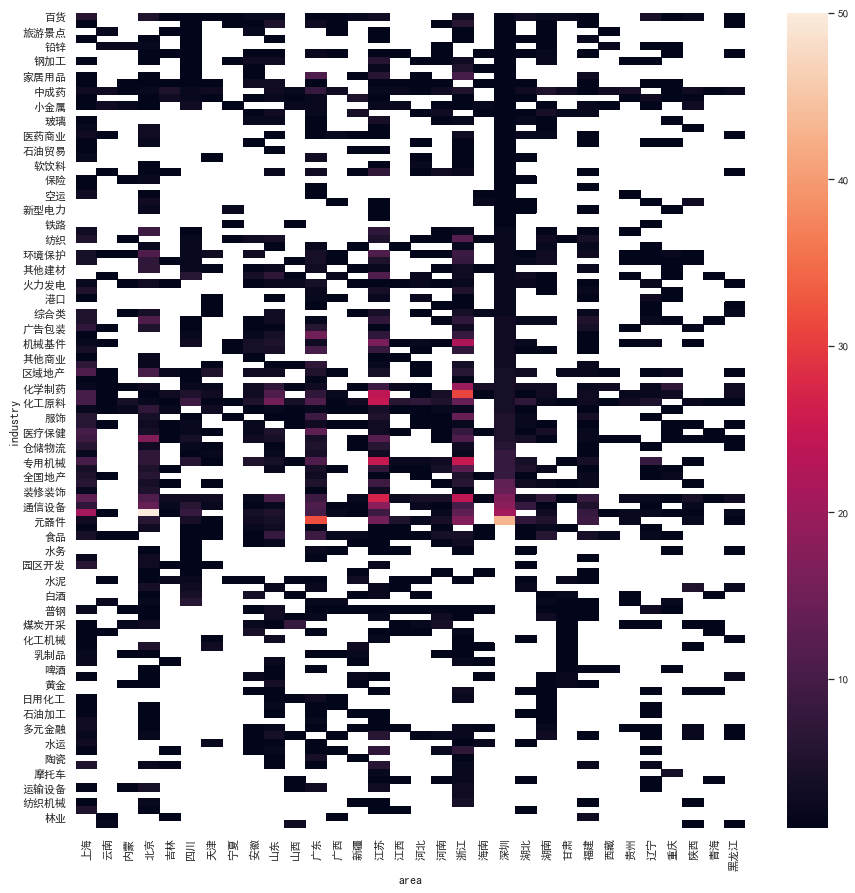

In [33]:
plt.figure(figsize=(15,15))
sns.heatmap(e)

# 管道方法

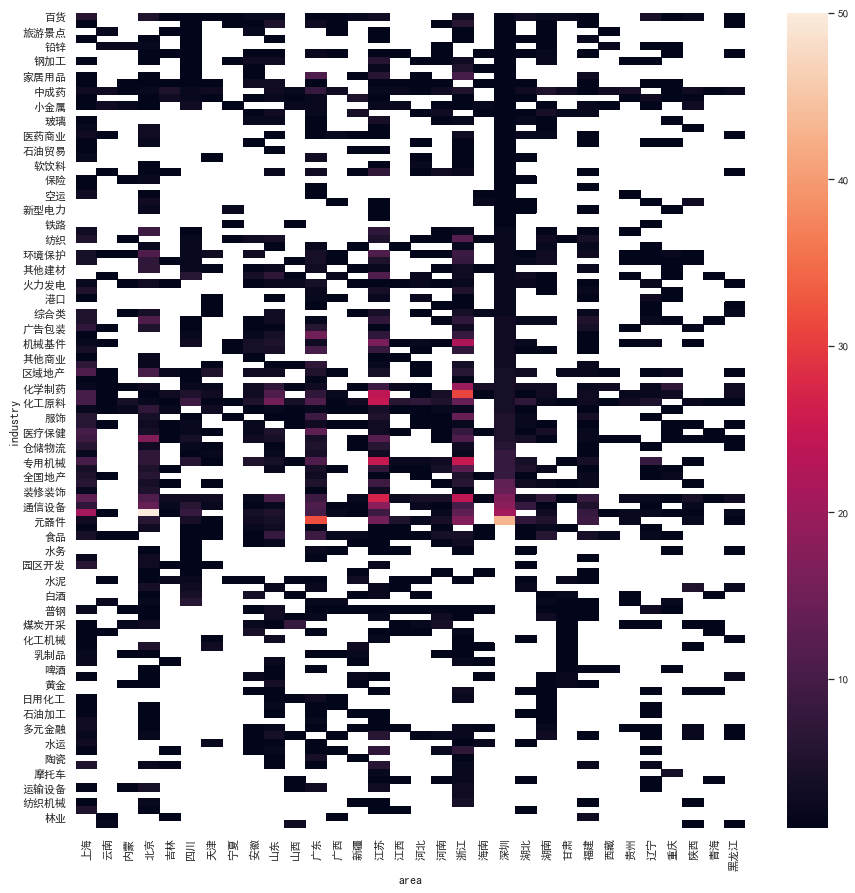

In [34]:
plt.figure(figsize=(15,15))
df \
.pipe(lambda x:x.loc[:,['industry','area','pe']]) \
.pipe(lambda x:x.groupby(['industry','area']).count()) \
.pipe(lambda x:x.reset_index().pivot('industry','area','pe').sort_values(by=df.loc[:,'area'].unique().tolist())) \
.pipe(lambda x:sns.heatmap(x))